In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [2]:
# define global variables
test_size = 0.2
random_state = 42

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [4]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [5]:
# Create matrix X and Y as numpy arrays 
# if we dont use .values, it will remain a dataframe
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

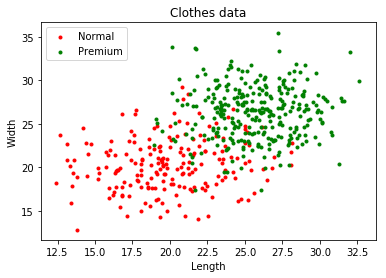

In [6]:
# Visualize the data
plt.scatter(x = X[Y == 0, 0], y = X[Y == 0, 1], color = 'red', marker = '.', label = 'Normal')
plt.scatter(x = X[Y == 1, 0], y = X[Y == 1, 1], color = 'green', marker = '.', label='Premium')
plt.title("Clothes data")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [7]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [8]:
# Perform the same operations with feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
# No reason to fit for test, because we want to use the same fit we used for training for the test as well
X_test = scaler_X.transform(X_test)
# Classification
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = random_state)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Training fit
from commonfunctions import print_classification_results, plot_classification_summary
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)

Confusion Matrix:
 [[136  22]
 [ 14 228]]
Accuracy score: 0.91
Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.86      0.88       158
          1       0.91      0.94      0.93       242

avg / total       0.91      0.91      0.91       400



In [10]:
# Testing fit 
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100



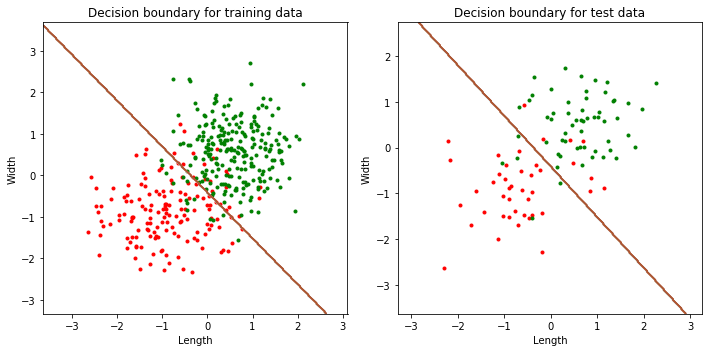

In [11]:
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

Classification summary: Training data
Confusion Matrix:
 [[135  23]
 [ 14 228]]
Accuracy score: 0.9075
Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.85      0.88       158
          1       0.91      0.94      0.92       242

avg / total       0.91      0.91      0.91       400

Classification summary: Test data
Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100

Decision boundary


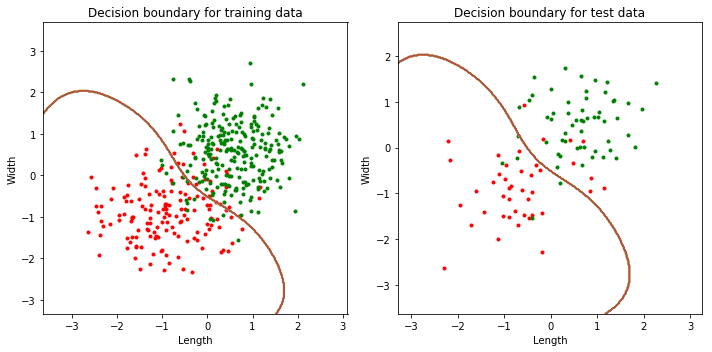

In [12]:
# Check out the other kernels now
classifier = SVC(kernel = 'rbf', random_state = random_state)
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print("Classification summary: Training data")
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print("Classification summary: Test data")
print_classification_results(Y_test, Y_pred)
print("Decision boundary")
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

Classification summary: Training data
Confusion Matrix:
 [[139  19]
 [ 23 219]]
Accuracy score: 0.895
Classification Report:
              precision    recall  f1-score   support

          0       0.86      0.88      0.87       158
          1       0.92      0.90      0.91       242

avg / total       0.90      0.90      0.90       400

Classification summary: Test data
Confusion Matrix:
 [[32 10]
 [ 6 52]]
Accuracy score: 0.84
Classification Report:
              precision    recall  f1-score   support

          0       0.84      0.76      0.80        42
          1       0.84      0.90      0.87        58

avg / total       0.84      0.84      0.84       100

Decision boundary


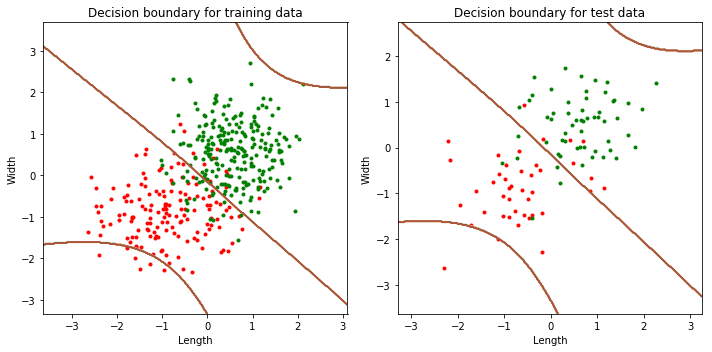

In [13]:
# Check out the other kernels now
classifier = SVC(kernel = 'sigmoid', random_state = random_state)
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print("Classification summary: Training data")
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print("Classification summary: Test data")
print_classification_results(Y_test, Y_pred)
print("Decision boundary")
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

Classification summary: Training data
Confusion Matrix:
 [[114  44]
 [  4 238]]
Accuracy score: 0.88
Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.72      0.83       158
          1       0.84      0.98      0.91       242

avg / total       0.89      0.88      0.88       400

Classification summary: Test data
Confusion Matrix:
 [[29 13]
 [ 2 56]]
Accuracy score: 0.85
Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.69      0.79        42
          1       0.81      0.97      0.88        58

avg / total       0.86      0.85      0.85       100

Decision boundary


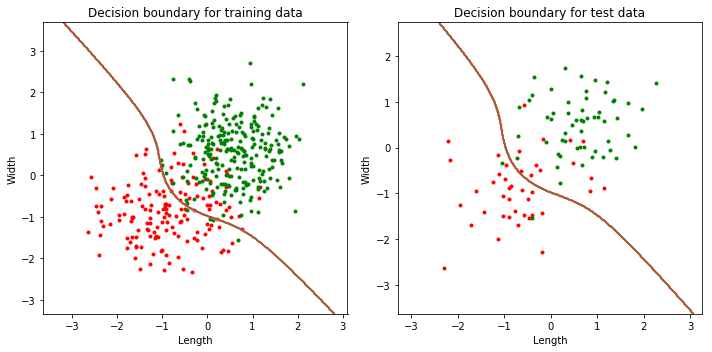

In [14]:
# Check out the other kernels now
classifier = SVC(kernel = 'poly', random_state = random_state)
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print("Classification summary: Training data")
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print("Classification summary: Test data")
print_classification_results(Y_test, Y_pred)
print("Decision boundary")
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

Classification summary: Training data
Confusion Matrix:
 [[ 27 131]
 [  6 236]]
Accuracy score: 0.6575
Classification Report:
              precision    recall  f1-score   support

          0       0.82      0.17      0.28       158
          1       0.64      0.98      0.78       242

avg / total       0.71      0.66      0.58       400

Classification summary: Test data
Confusion Matrix:
 [[ 4 38]
 [ 2 56]]
Accuracy score: 0.6
Classification Report:
              precision    recall  f1-score   support

          0       0.67      0.10      0.17        42
          1       0.60      0.97      0.74        58

avg / total       0.63      0.60      0.50       100

Decision boundary


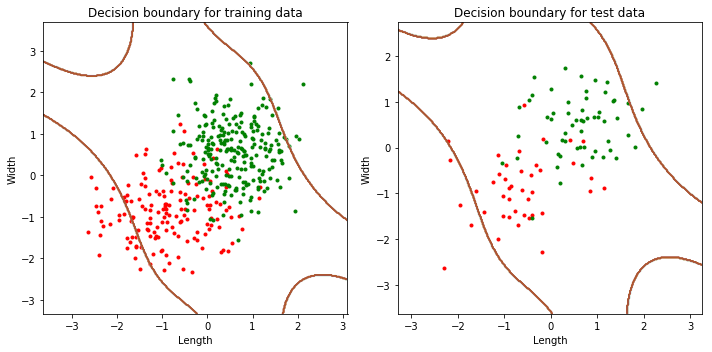

In [15]:
# Check out the other kernels now
classifier = SVC(kernel = 'poly', degree = 6, random_state = random_state)
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print("Classification summary: Training data")
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print("Classification summary: Test data")
print_classification_results(Y_test, Y_pred)
print("Decision boundary")
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

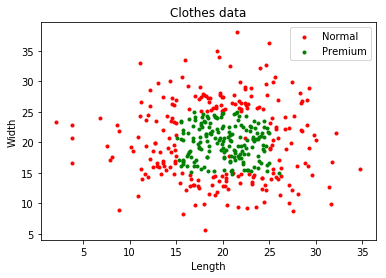

In [16]:
# Let us look at some radially distributed data
dataset = pd.read_csv('../Data/clothes_radial.csv')
dataset = dataset.drop(['Id'], axis = 1)
# Get X and Y
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
# Plot and view the data
plt.scatter(x = X[Y == 0, 0], y = X[Y == 0, 1], color = 'red', marker = '.', label = 'Normal')
plt.scatter(x = X[Y == 1, 0], y = X[Y == 1, 1], color = 'green', marker = '.', label='Premium')
plt.title("Clothes data")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [17]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [18]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
# No reason to fit for test, because we want to use the same fit we used for training for the test as well
X_test = scaler_X.transform(X_test)

Classification summary: Training data
Confusion Matrix:
 [[159  13]
 [  4 144]]
Accuracy score: 0.946875
Classification Report:
              precision    recall  f1-score   support

          0       0.98      0.92      0.95       172
          1       0.92      0.97      0.94       148

avg / total       0.95      0.95      0.95       320

Classification summary: Test data
Confusion Matrix:
 [[47  7]
 [ 2 24]]
Accuracy score: 0.8875
Classification Report:
              precision    recall  f1-score   support

          0       0.96      0.87      0.91        54
          1       0.77      0.92      0.84        26

avg / total       0.90      0.89      0.89        80

Decision boundary


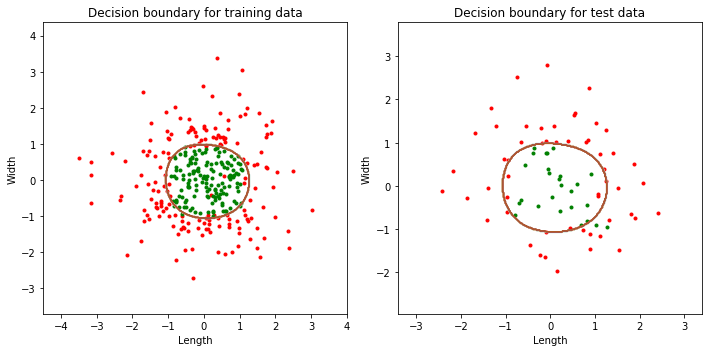

In [19]:
# Train this with rbf kernel
classifier = SVC(kernel = 'rbf', random_state = random_state)
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print("Classification summary: Training data")
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print("Classification summary: Test data")
print_classification_results(Y_test, Y_pred)
print("Decision boundary")
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

Classification summary: Training data
Confusion Matrix:
 [[172   0]
 [148   0]]
Accuracy score: 0.5375
Classification Report:
              precision    recall  f1-score   support

          0       0.54      1.00      0.70       172
          1       0.00      0.00      0.00       148

avg / total       0.29      0.54      0.38       320

Classification summary: Test data
Confusion Matrix:
 [[54  0]
 [26  0]]
Accuracy score: 0.675
Classification Report:
              precision    recall  f1-score   support

          0       0.68      1.00      0.81        54
          1       0.00      0.00      0.00        26

avg / total       0.46      0.68      0.54        80

Decision boundary: Training data


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


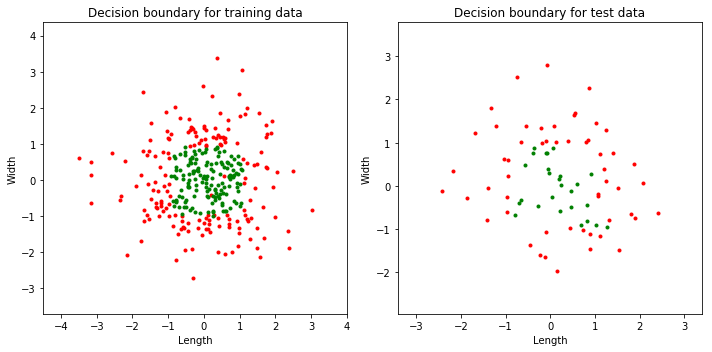

In [20]:
# Train this with linear kernel
classifier = SVC(kernel = 'linear', random_state = random_state)
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print("Classification summary: Training data")
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print("Classification summary: Test data")
print_classification_results(Y_test, Y_pred)
print("Decision boundary: Training data")
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)